In [1]:
import os
import openai

In [2]:
openai.api_key = os.getenv('OPENAI_API_KEY')

In [3]:
def create_dish_prompt(list_of_ingredients):
    
    prompt = f"Create a detailed recipe based on only the following ingredients: {', '.join(list_of_ingredients)}.\n"\
             +f"Additionally, assign a title starting with 'Recipe Title: ' to this recipe."
    
    return prompt

In [4]:
recipe = create_dish_prompt(['ham', 'turkey', 'eggs', 'bread'])

In [5]:
recipe

"Create a detailed recipe based on only the following ingredients: ham, turkey, eggs, bread.\nAdditionally, assign a title starting with 'Recipe Title: ' to this recipe."

In [6]:
response = openai.Completion.create(engine='text-davinci-003', 
                                    prompt=recipe, 
                                    max_tokens=512, 
                                    temperature=0.7)

In [7]:
result_text = response['choices'][0]['text']

In [8]:
import re

In [9]:
result_text.split('Recipe Title: ')

['\n\n',
 'Turkey and Ham Egg Sandwiches\n\nIngredients:\n- 2 slices of ham\n- 2 slices of turkey\n- 2 eggs\n- 2 slices of bread\n\nInstructions:\n1. Heat a skillet over medium heat.\n2. Place the ham and turkey slices in the skillet and cook until lightly browned, about 2 minutes per side.\n3. Crack the eggs into the skillet. Cook for about 3 minutes, stirring occasionally, until the eggs are cooked through.\n4. Toast the bread slices.\n5. Assemble the sandwiches by putting the eggs, ham, and turkey on one slice of toast and topping with the other slice.\n6. Enjoy!']

In [10]:
def extract_title(recipe):
    return re.findall('^.*Recipe Title: .*$', recipe, re.MULTILINE)[0].strip().split('Recipe Title: ')[-1]

In [11]:
recipe_title = extract_title(result_text)

In [12]:
recipe_title

'Turkey and Ham Egg Sandwiches'

In [13]:
def dalle2_prompt(recipe_title):
    prompt = f"{recipe_title}, professional food photography, 15mm, studio lighting"
    return prompt

In [14]:
dalle2_prompt(recipe_title)

'Turkey and Ham Egg Sandwiches, professional food photography, 15mm, studio lighting'

In [15]:
response = openai.Image.create(prompt=dalle2_prompt(recipe_title), 
                               n=1, 
                               size='1024x1024')

In [16]:
image_url = response['data'][0]['url']

In [17]:
import requests
import shutil

In [18]:
def save_image(image_url, file_name):
    
    image_result = requests.get(image_url, stream=True)

    if image_result.status_code == 200:
        with open(file_name, 'wb') as f:
            shutil.copyfileobj(image_result.raw, f)
    else:
        print('ERROR LOADING FILE')
        
    return image_result.status_code

In [19]:
save_image(image_url, '../data/example_download.png')

200

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

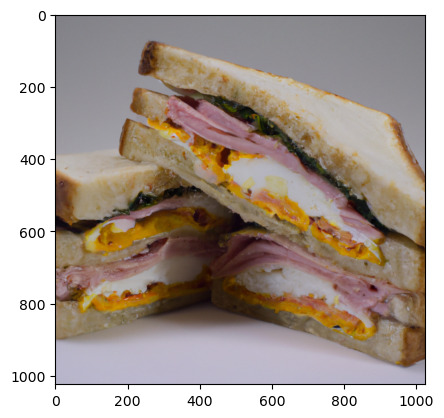

In [21]:
img = mpimg.imread('../data/example_download.png')
imgplot = plt.imshow(img)
plt.show()